In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
df = pd.read_csv('ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


d:\program files (x86)\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


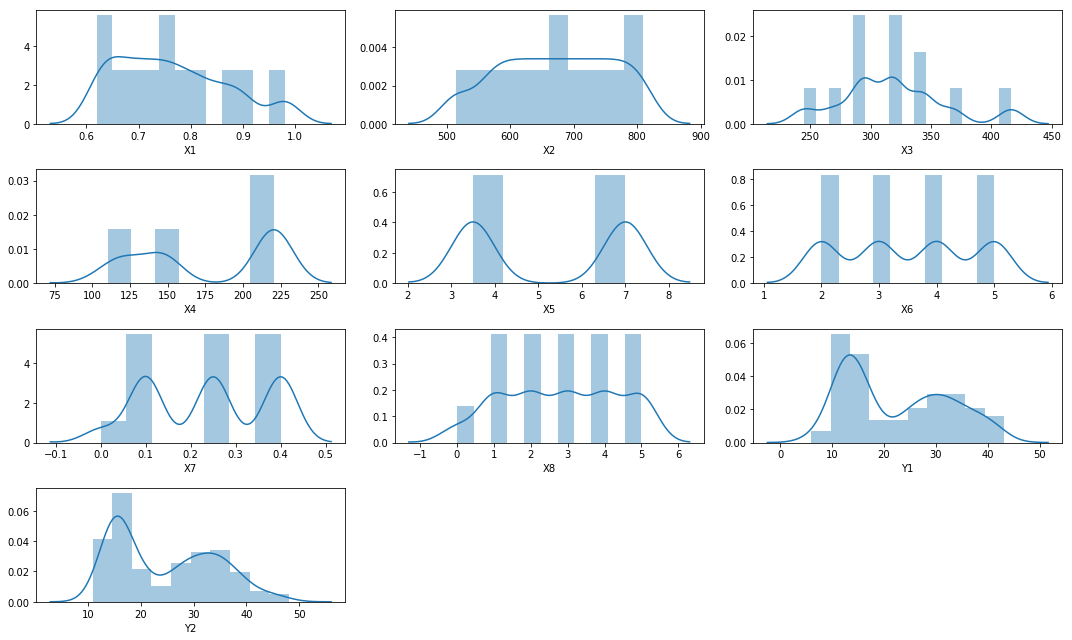

In [5]:
# summary
fig = plt.figure(figsize = (15,9))
for a,b in enumerate(df.columns):
    ax = fig.add_subplot(4,3,a+1)
    sns.distplot(df[b])
plt.tight_layout()

#### Assignment Goal: 
Use neural network (Deep Learning) to predict the heating and cooling load of the building. 

For this project you need to use some base Regression models and ensemble and compare r2_score. 

Adding cooling load and heating load can define the overall load of the apartment. Study the trend of overall load and divide it into three classes, low efficient, high efficient and average efficient. Then train a deep learning model to predict the label. 

-	X1	Relative Compactness 
-	X2	Surface Area 
-	X3	Wall Area 
-	X4	Roof Area 
-	X5	Overall Height 
-	X6	Orientation 
-	X7	Glazing Area 
-	X8	Glazing Area Distribution 
-	y1	Heating Load 
-	y2	Cooling Load

### Use neural network (Deep Learning) to predict the heating and cooling load of the building.

In [186]:
X = df.drop(['Y1','Y2'], axis = 1)
y1 = df['Y1']
y2 = df['Y2']
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1,y2, random_state = 20)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
scores = {}

#### MLPRegressor

In [187]:
from sklearn.neural_network import MLPRegressor

nnclf = MLPRegressor(hidden_layer_sizes = [100,50,20],activation ='relu', solver='adam',max_iter = 10000,random_state = 0).fit(X_train, y1_train)
print("Y1: \ntrain r2: {} \ntest r2: {}".format(nnclf.score(X_train, y1_train),nnclf.score(X_test, y1_test)))
scores['MLPRegressor'] = {'Y1 Train':nnclf.score(X_train, y1_train), 'Y1 Test':nnclf.score(X_test, y1_test) }
nnclf = MLPRegressor(hidden_layer_sizes = [100,50,20],activation ='relu', solver='adam',max_iter = 10000,random_state = 0).fit(X_train, y2_train)
print("Y2: \ntrain r2: {} \ntest r2: {}".format(nnclf.score(X_train, y2_train),nnclf.score(X_test, y2_test)))
scores['MLPRegressor'].update({'Y2 Train':nnclf.score(X_train, y2_train), 'Y2 Test':nnclf.score(X_test, y2_test)})

Y1: 
train r2: 0.9967945780719942 
test r2: 0.9950502387996815
Y2: 
train r2: 0.9684808179247184 
test r2: 0.9655793283810404


#### Keras

In [188]:
from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer = 'normal',activation='relu'))
model.add(Dense(4, kernel_initializer = 'normal',activation='relu'))
model.add(Dense(1, kernel_initializer = 'normal'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Fit the model

# Y1:
model.fit(X_train, y1_train, epochs=150, batch_size=20)
y1_train_predict = model.predict(X_train)
y1_test_predict = model.predict(X_test)

# Y2:
model.fit(X_train, y2_train, epochs=150, batch_size=20)
y2_train_predict = model.predict(X_train)
y2_test_predict = model.predict(X_test)

Epoch 1/150
576/576 [==============================] - 1s 2ms/step - loss: 605.6713 - mean_squared_error: 605.6713
Epoch 2/150
576/576 [==============================] - 0s 103us/step - loss: 603.0001 - mean_squared_error: 603.0001
Epoch 3/150
576/576 [==============================] - 0s 99us/step - loss: 597.4072 - mean_squared_error: 597.4072
Epoch 4/150
576/576 [==============================] - 0s 99us/step - loss: 585.9233 - mean_squared_error: 585.9233
Epoch 5/150
576/576 [==============================] - 0s 92us/step - loss: 564.5497 - mean_squared_error: 564.5497
Epoch 6/150
576/576 [==============================] - 0s 86us/step - loss: 530.2460 - mean_squared_error: 530.2460
Epoch 7/150
576/576 [==============================] - 0s 103us/step - loss: 481.8430 - mean_squared_error: 481.8430
Epoch 8/150
576/576 [==============================] - 0s 120us/step - loss: 419.4979 - mean_squared_error: 419.4979
Epoch 9/150
576/576 [==============================] - 0s 89us/step - 

576/576 [==============================] - 0s 94us/step - loss: 9.2142 - mean_squared_error: 9.2142
Epoch 141/150
576/576 [==============================] - 0s 104us/step - loss: 9.1483 - mean_squared_error: 9.1483
Epoch 142/150
576/576 [==============================] - 0s 120us/step - loss: 9.1223 - mean_squared_error: 9.1223
Epoch 143/150
576/576 [==============================] - 0s 134us/step - loss: 9.1024 - mean_squared_error: 9.1024
Epoch 144/150
576/576 [==============================] - 0s 132us/step - loss: 9.1190 - mean_squared_error: 9.1190
Epoch 145/150
576/576 [==============================] - 0s 87us/step - loss: 9.1254 - mean_squared_error: 9.1254
Epoch 146/150
576/576 [==============================] - 0s 83us/step - loss: 9.0752 - mean_squared_error: 9.0752
Epoch 147/150
576/576 [==============================] - 0s 99us/step - loss: 9.0739 - mean_squared_error: 9.0739
Epoch 148/150
576/576 [==============================] - 0s 108us/step - loss: 9.0430 - mean_squar

Epoch 61/150
576/576 [==============================] - 0s 92us/step - loss: 10.6771 - mean_squared_error: 10.6771
Epoch 62/150
576/576 [==============================] - 0s 106us/step - loss: 10.6838 - mean_squared_error: 10.6838
Epoch 63/150
576/576 [==============================] - 0s 96us/step - loss: 10.6651 - mean_squared_error: 10.6651
Epoch 64/150
576/576 [==============================] - 0s 94us/step - loss: 10.6522 - mean_squared_error: 10.6522
Epoch 65/150
576/576 [==============================] - 0s 132us/step - loss: 10.6666 - mean_squared_error: 10.6666
Epoch 66/150
576/576 [==============================] - 0s 118us/step - loss: 10.6443 - mean_squared_error: 10.6443
Epoch 67/150
576/576 [==============================] - 0s 99us/step - loss: 10.6542 - mean_squared_error: 10.6542
Epoch 68/150
576/576 [==============================] - 0s 92us/step - loss: 10.6249 - mean_squared_error: 10.6249
Epoch 69/150
576/576 [==============================] - 0s 130us/step - loss:

In [189]:
#evaluation:
from sklearn.metrics import r2_score
print("Y1: \nTrain r2:{:.2f} \nTest r2:{:.2f}".format(r2_score(y1_train, y1_train_predict),r2_score(y1_test, y1_test_predict)))
print("Y2: \nTrain r2:{:.2f} \nTest r2:{:.2f}".format(r2_score(y2_train, y2_train_predict),r2_score(y2_test, y2_test_predict)))
scores['keras'] = {'Y1 Train':r2_score(y1_train, y1_train_predict), 'Y1 Test':r2_score(y1_test, y1_test_predict),
                  'Y2 Train':r2_score(y2_train, y2_train_predict),'Y2 Test':r2_score(y2_test, y2_test_predict)}

Y1: 
Train r2:0.91 
Test r2:0.91
Y2: 
Train r2:0.89 
Test r2:0.89


### Use some base Regression models and ensemble and compare r2_score.

In [190]:
# LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y1_train)
print("Y1: \ntrain r2: {} \ntest r2: {}".format(lr.score(X_train, y1_train),lr.score(X_test, y1_test)))
scores['LinearRegression'] = {'Y1 Train':lr.score(X_train, y1_train), 'Y1 Test':lr.score(X_test, y1_test)}

lr = LinearRegression().fit(X_train, y2_train)
print("Y2: \ntrain r2: {} \ntest r2: {}".format(lr.score(X_train, y2_train),lr.score(X_test, y2_test)))
scores['LinearRegression'].update({'Y2 Train':lr.score(X_train, y1_train),'Y2 Test':lr.score(X_test, y1_test)})

Y1: 
train r2: 0.9183477248623643 
test r2: 0.9070216190795463
Y2: 
train r2: 0.8879849516667886 
test r2: 0.8805755700694226


In [191]:
# Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.01,0.1,1,10,100]}

grid = GridSearchCV(Ridge(),param, cv = 10).fit(X_train, y1_train)
print("Y1: \ntrain r2: {} \ntest r2: {}".format(grid.score(X_train, y1_train),grid.score(X_test, y1_test)))
scores['Ridge'] = {'Y1 Train':grid.score(X_train, y1_train),'Y1 Test':grid.score(X_test, y1_test) }

grid = GridSearchCV(Ridge(), param, cv = 10).fit(X_train, y2_train)
print("Y2: \ntrain r2: {} \ntest r2: {}".format(grid.score(X_train, y2_train),grid.score(X_test, y2_test)))
scores['Ridge'].update({'Y2 Train':grid.score(X_train, y2_train),'Y2 Test':grid.score(X_test, y2_test) })

Y1: 
train r2: 0.9185932584724295 
test r2: 0.9069706555840268
Y2: 
train r2: 0.8887619955470201 
test r2: 0.8821632957552741


In [192]:
# LinearSVR
from sklearn.svm import LinearSVR
param = {'C': [0.01,0.1,1,10,100]}

grid = GridSearchCV(LinearSVR(),param, cv = 10).fit(X_train, y1_train)
print("Y1: \ntrain r2: {} \ntest r2: {}".format(grid.score(X_train, y1_train),grid.score(X_test, y1_test)))
scores['LinearSVR'] = {'Y1 Train':grid.score(X_train, y1_train),'Y1 Test':grid.score(X_test, y1_test) }

grid = GridSearchCV(LinearSVR(), param, cv = 10).fit(X_train, y2_train)
print("Y2: \ntrain r2: {} \ntest r2: {}".format(grid.score(X_train, y2_train),grid.score(X_test, y2_test)))
scores['LinearSVR'].update({'Y2 Train':grid.score(X_train, y2_train),'Y2 Test':grid.score(X_test, y2_test) })

Y1: 
train r2: 0.9131395970037801 
test r2: 0.9037210975546945
Y2: 
train r2: 0.8833143539189803 
test r2: 0.871572163226848


In [200]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor().fit(X_train, y1_train)
print("Y1: \ntrain r2: {} \ntest r2: {}".format(forest.score(X_train, y1_train),forest.score(X_test, y1_test)))
scores['RandomForestRegressor'] = {'Y1 Train':forest.score(X_train, y1_train),'Y1 Test':forest.score(X_test, y1_test)}

forest = RandomForestRegressor().fit(X_train, y2_train)
print("Y2: \ntrain r2: {} \ntest r2: {}".format(forest.score(X_train, y2_train),forest.score(X_test, y2_test)))
scores['RandomForestRegressor'].update({'Y2 Train':forest.score(X_train, y2_train),'Y2 Test':forest.score(X_test, y2_test)})

Y1: 
train r2: 0.9994954407896643 
test r2: 0.9978216053325386
Y2: 
train r2: 0.993959068426486 
test r2: 0.9676756016540249


In [208]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor().fit(X_train, y1_train)
print("Y1: \ntrain r2: {} \ntest r2: {}".format(abr.score(X_train, y1_train),abr.score(X_test, y1_test)))
scores['AdaBoostRegressor'] = {'Y1 Train':abr.score(X_train, y1_train),'Y1 Test':abr.score(X_test, y1_test)}

abr = AdaBoostRegressor().fit(X_train, y2_train)
print("Y2: \ntrain r2: {} \ntest r2: {}".format(abr.score(X_train, y2_train),abr.score(X_test, y2_test)))
scores['AdaBoostRegressor'].update({'Y2 Train':abr.score(X_train, y2_train),'Y2 Test':abr.score(X_test, y2_test)})

Y1: 
train r2: 0.9665506754513616 
test r2: 0.963659556915107
Y2: 
train r2: 0.9358800579623501 
test r2: 0.9304484810357982


In [209]:
pd.DataFrame(scores).T

,Y1 Test,Y1 Train,Y2 Test,Y2 Train
AdaBoostRegressor,0.963660,0.966551,0.930448,0.935880
LinearRegression,0.907022,0.918348,0.818856,0.854791
LinearSVR,0.903721,0.913140,0.871572,0.883314
MLPRegressor,0.995050,0.996795,0.965579,0.968481
RandomForestRegressor,0.997822,0.999495,0.967676,0.993959
Ridge,0.906971,0.918593,0.882163,0.888762
keras,0.909807,0.911890,0.888523,0.889938


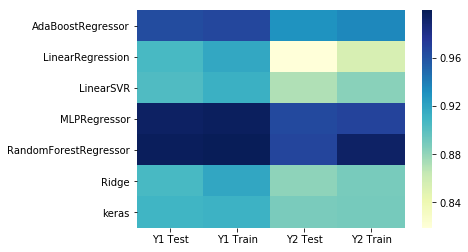

In [210]:
sns.heatmap(pd.DataFrame(scores).T,cmap="YlGnBu")

As we can see in the figure above, deeper color means higher r2 scores. Ensenble algorithms have better performance than base regression model, even without adjust parameters.

#### Adding cooling load and heating load can define the overall load of the apartment. Study the trend of overall load and divide it into three classes, low efficient, high efficient and average efficient. Then train a deep learning model to predict the label.

In [119]:
# High efficient: 16-30 number:224 label: -1
# Average efficient:30-60 number: 312 label: 0
# Low efficient: 60-90 number: 232 label: 1
Labels = []
for i in range(len(df)):
    if df.loc[i,'Y1']+df.loc[i,'Y2']<=30:
        Labels.append('HE')
    elif df.loc[i,'Y1']+df.loc[i,'Y2']<=60:
        Labels.append('AE')
    else:
        Labels.append('LE')
df['Label'] = Labels
df.Label.value_counts()

AE    312
LE    232
HE    224
Name: Label, dtype: int64

In [176]:
# create model
model = Sequential()
model.add(Dense(50, input_dim=8, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [179]:
# Fit the model
X_train, X_test, y_train, y_test = train_test_split(df['X1 X2 X3 X4 X5 X6 X7 X8'.split()],pd.get_dummies(df['Label']),random_state = 20)
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
576/576 [==============================] - 0s 209us/step - loss: 0.4128 - acc: 0.7778
Epoch 2/150
576/576 [==============================] - 0s 186us/step - loss: 0.4071 - acc: 0.7801
Epoch 3/150
576/576 [==============================] - 0s 205us/step - loss: 0.4164 - acc: 0.7691
Epoch 4/150
576/576 [==============================] - 0s 172us/step - loss: 0.4026 - acc: 0.7801
Epoch 5/150
576/576 [==============================] - 0s 232us/step - loss: 0.4044 - acc: 0.7888
Epoch 6/150
576/576 [==============================] - 0s 170us/step - loss: 0.4018 - acc: 0.7749
Epoch 7/150
576/576 [==============================] - 0s 203us/step - loss: 0.4150 - acc: 0.7645
Epoch 8/150
576/576 [==============================] - 0s 201us/step - loss: 0.4035 - acc: 0.7784
Epoch 9/150
576/576 [==============================] - 0s 252us/step - loss: 0.4074 - acc: 0.7789
Epoch 10/150
576/576 [==============================] - 0s 181us/step - loss: 0.4099 - acc: 0.7760
Epoch 11/150
576/57

In [180]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 68us/step

acc: 88.37%
